### Boston House Price Prediction

In [47]:
#Start by importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [35]:
boston_data = load_boston()


# Make a dataframe from the data in boston_data.

boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# Add the target variable MEDV to the dataframe

boston['MEDV'] = boston_data.target # MEDV is the median value of owner-occupied homes in $1000s

# Print the first five rows of the dataframe.

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


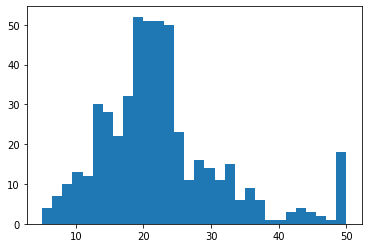

In [39]:
#Check for null values

print(boston.isnull().sum())

#Great! No null values. Let's move on to the next step.

#Let's see a histogram of the target variable.

plt.hist(boston['MEDV'], bins=30)
plt.show() #The distribution is mostly normal with a few outliers.

<AxesSubplot:>

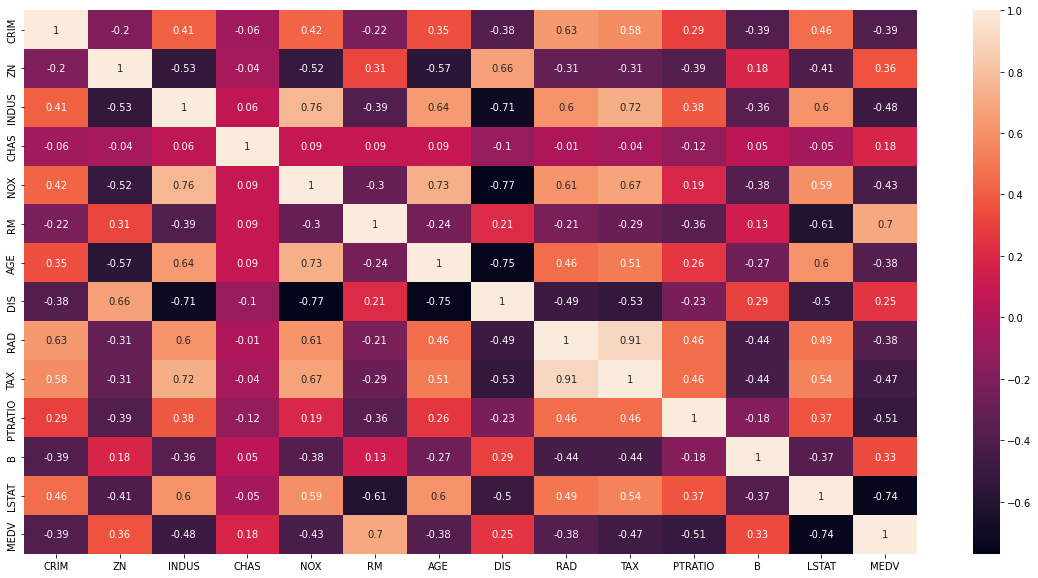

In [43]:
#Let's see how the target variable is correlated with the other variables.

#We will use the correlation matrix for this.

correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square

plt.figure(figsize=(20, 10))
sns.heatmap(data=correlation_matrix, annot=True)

#From the matrix we see RM and LSTAT have a high correlation with MEDV. 

#RM Co_oef: 0.7
#LSTAT Co_oef: -0.74


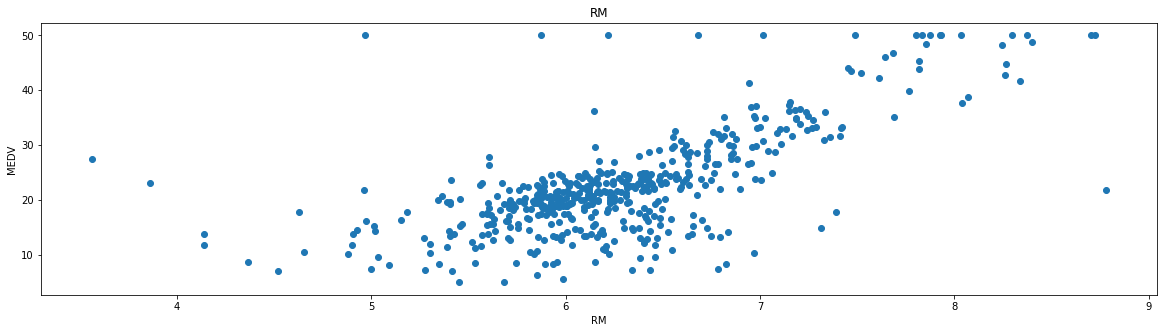

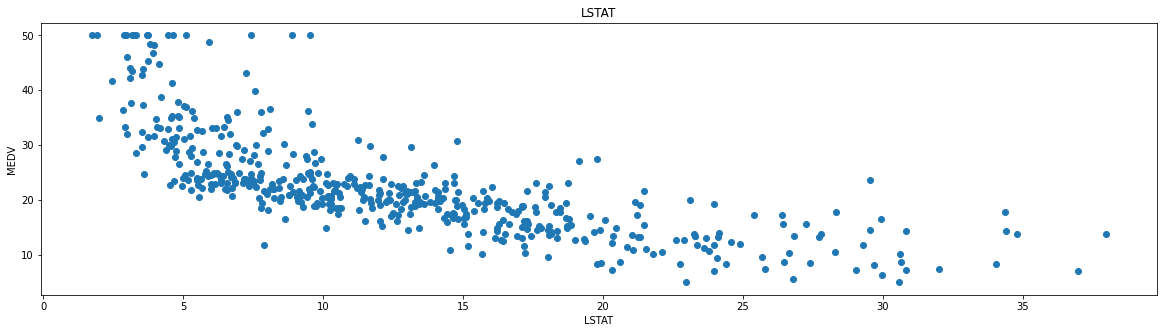

In [45]:
#Let's plot a scatter plot between RM and MEDV.

plt.figure(figsize=(20, 5))

features = ['RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


#Let's plot a scatter plot between LSTAT and MEDV.

plt.figure(figsize=(20, 5))

features = ['LSTAT']


for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')





In [48]:
#Prepare the data for training the model.

#First, we will separate the target variable from the rest of the variables.

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']


#Spliting time!

#We will use 80% of the data for training and the remaining 20% for testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)



In [49]:
#Training the model.

#We will use Linear Regression for this as our target variable is a pretty decent linear model (to some degree).

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

#Let's see how well our model performed on the training set.

y_train_predict = lin_model.predict(X_train)
mse = (mean_squared_error(Y_train, y_train_predict))

print("The model performance for training set")

print(f'MSE is {mse}')

#Accuracy

print(f'Accuracy is {lin_model.score(X_train, Y_train)}') 

#The accuracy is poor but that is simple linear regression without any proper use of the cost function (MSE) in gradient descent/optimizing the parameters.





The model performance for training set
MSE is 31.77722714032021
Accuracy is 0.6300745149331701


### END OF CODE :)